In [80]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.interpolate import interp1d
from scipy.optimize import fsolve
from matplotlib.ticker import FuncFormatter
from matplotlib.lines import Line2D

In [81]:
'''I will start by just generating matrices of random numbers to see if I can get the right neutrino masses and mixings.'''

#EVERYTHING IS SET TO GeV.

'I will start by just generating matrices of random numbers to see if I can get the right neutrino masses and mixings.'

In [82]:
#Symmetric Complex Matrix - MAJORANA
#np.random.seed(1234)
A = (np.random.uniform(5e-8, 1.5e-7, (3,3)) + 1j*np.random.uniform(0.5e-8, 1.5e-7, (3,3)))
mL = (A + A.T)/2 #Making sure the matrix is symmetric
B = (np.random.uniform(5e-8, 1.5e-7, (3,3)) + 1j*np.random.uniform(0.5e-8, 1.5e-7, (3,3)))
mR = (B + B.T)/2 #Making sure the matrix is symmetric

In [83]:
#General Complex Matrices - DIRAC
#np.random.seed(1234)
C = (np.random.uniform(10, 246, (3,3)) + 1j*np.random.uniform(10, 246, (3,3)))
mD = C
D = (np.random.uniform(500, 1500,(3,3)) + 1j*np.random.uniform(500, 1500, (3,3)))
mN = D

In [84]:
#How to Diagonalize the neutrino mass matrix -- Takagi Decomposition

mLight = mD.T @ np.linalg.inv(mN) @ mL @ np.linalg.inv(mN.T) @ mD #Seesaw Formula

U, S, Vh = np.linalg.svd(mLight) #SVD diagonalization
#U is the left singular vectors (PMNS matrix)
#Vh is the right singular vectors (not needed here)

#S is the array of singular values (neutrino masses)

#In order to get the mixing angles, we need to extract the PMNS matrix from U

s13 = np.abs(U[0,2])
c12 = np.abs(U[0,0]) / np.sqrt(1 - s13**2)
s12 = np.sqrt(1 - c12**2)
s23 = np.abs(U[1,2]) / np.sqrt(1 - s13**2)

print("Neutrino Masses (GeV):", S)
print("Mixing Angles:")
print("theta_12 (degrees):", np.degrees(np.arcsin(s12)))
print("theta_13 (degrees):", np.degrees(np.arcsin(s13)))
print("theta_23 (degrees):", np.degrees(np.arcsin(s23)))

Neutrino Masses (GeV): [1.48294309e-08 4.84439171e-09 8.28433387e-10]
Mixing Angles:
theta_12 (degrees): 55.28322673581772
theta_13 (degrees): 35.868023251248104
theta_23 (degrees): 60.10538506406859


In [85]:
'''What will be the masses of the Heavy Neutrinos?'''

MS = np.block([
    [mR, mN.T],
    [mN, mL]
])

U_heavy, S_heavy, Vh_heavy = np.linalg.svd(MS)

print("Heavy Neutrino Masses (eV):", S_heavy)

Heavy Neutrino Masses (eV): [3729.70204428 3729.70204347  662.11400546  662.11400541  348.83400526
  348.83400522]


In [86]:
'''What would \eta be?'''

MD = np.block([
    [mD],
    [np.zeros((3,3))]
])

G = (MD.T @ np.linalg.inv(MS)).conj()


eta = 1/2 * G @ G.conj().T
np.abs(eta[0,1])

<>:1: SyntaxWarning: invalid escape sequence '\e'
<>:1: SyntaxWarning: invalid escape sequence '\e'
/tmp/ipykernel_21705/3389840886.py:1: SyntaxWarning: invalid escape sequence '\e'
  '''What would \eta be?'''


0.013023864901356891

In [87]:
'''I now understand the general picture of generating the random matrices. Ofc the values above do not give me the correct values for mixing angle and masses, so now I will implement
a scan over many random matrices to get the correct value.'''

'I now understand the general picture of generating the random matrices. Ofc the values above do not give me the correct values for mixing angle and masses, so now I will implement\na scan over many random matrices to get the correct value.'

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


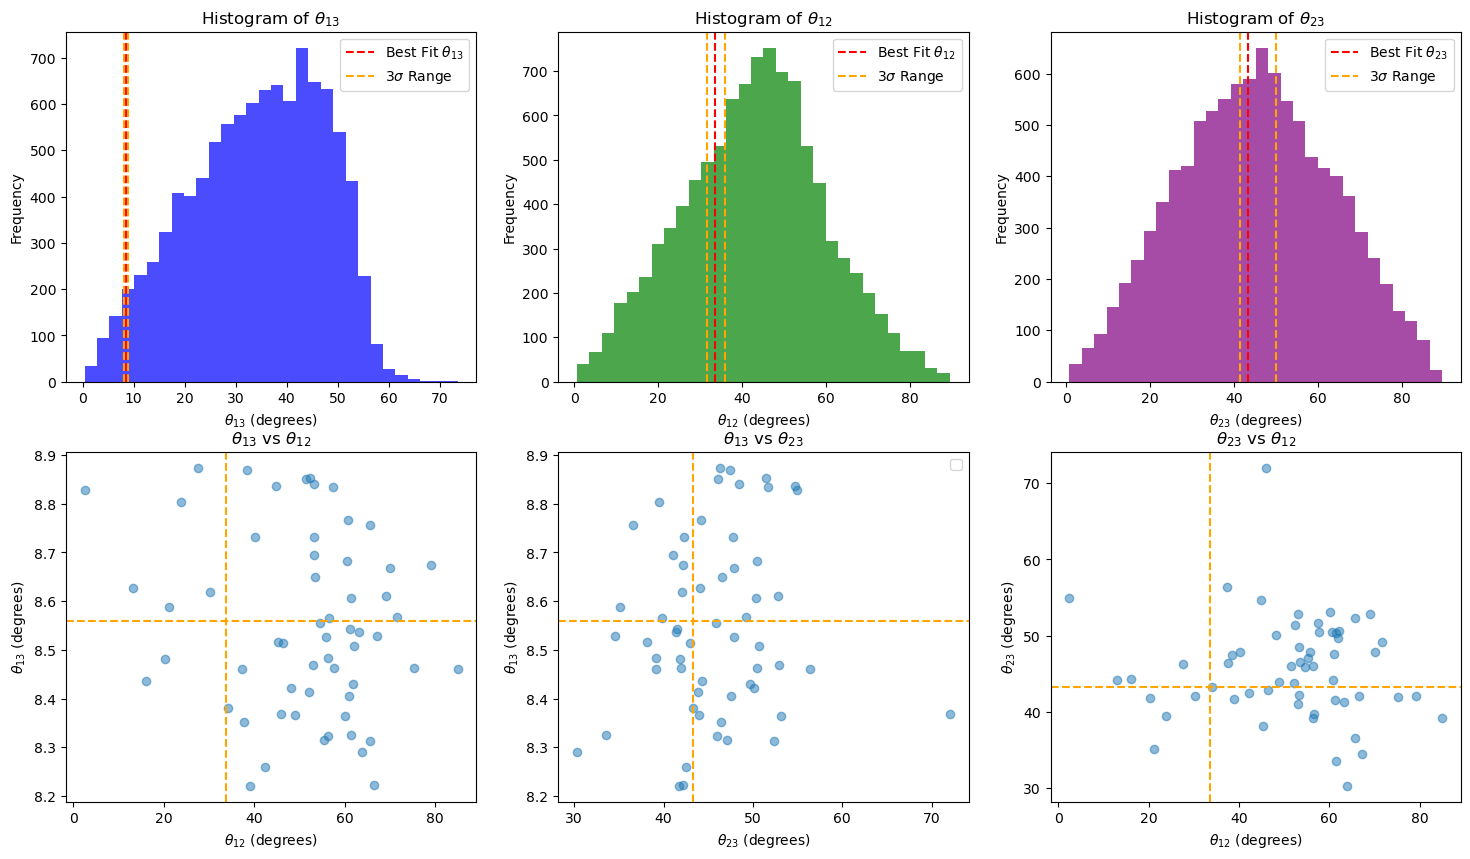

In [88]:
#Here I decided to run many times to see histograms of the mixing angles to see if they cluster around the experimental values or at least if they include them.

'''The three top plots are histograms of the mixing angles theta_13, theta_12, and theta_23 respectively.
The three bottom plots are scatter plots showing the correlations between the mixing angles for the cases where theta_13 is within the 3 sigma experimental range.'''

vS = 1e3 #VEV in GeV
vH = 246 #VEV in GeV
num_trials = 10000

theta13_vals = []
theta12_vals = []
theta23_vals = []

theta13_correct = []
theta12 = []
theta23 = []

for i in range(num_trials):
    A = (np.random.uniform(0.5e-10, 1e-10, (3,3)) + 1j*np.random.uniform(0.5e-10, 1.5e-10, (3,3)))
    yL = (A + A.T)/2 #Making sure the matrix is symmetric
    B = (np.random.uniform(0.5e-10, 1.5e-10, (3,3)) + 1j*np.random.uniform(0.5e-10, 1.5e-10, (3,3)))
    yR = (B + B.T)/2 #Making sure the matrix is symmetric
    C = (np.random.uniform(1, 1.5, (3,3)) + 1j*np.random.uniform(1, 1.5, (3,3)))
    yD = C
    D = (np.random.uniform(1, 1.5, (3,3)) + 1j*np.random.uniform(1, 1.5, (3,3)))
    yN = D
    mL, mR, mD, mN = vS*yL, vS*yR, vH*yD, vS*yN
    mLight = mD.T @ np.linalg.inv(mN) @ mL @ np.linalg.inv(mN.T) @ mD #Seesaw Formula
    U, S, Vh = np.linalg.svd(mLight)
    s13 = np.abs(U[0,2])
    c12 = np.abs(U[0,0]) / np.sqrt(1 - s13**2)
    s12 = np.sqrt(1 - c12**2)
    s23 = np.abs(U[1,2]) / np.sqrt(1 - s13**2)
    theta13_vals.append(np.degrees(np.arcsin(s13)))
    theta12_vals.append(np.degrees(np.arcsin(s12)))
    theta23_vals.append(np.degrees(np.arcsin(s23)))
    if 8.19 <= np.degrees(np.arcsin(s13)) <= 8.89:
        theta13_correct.append(np.degrees(np.arcsin(s13)))
        theta12.append(np.degrees(np.arcsin(s12)))
        theta23.append(np.degrees(np.arcsin(s23)))

fig, ax = plt.subplots(2,3, figsize=(18,10))

ax[0,0].hist(theta13_vals, bins = 30, color='blue', alpha=0.7)
ax[0,0].axvline(x=8.56, color='red', linestyle='--', label=r'Best Fit $\theta_{13}$')
ax[0,0].axvline(x=8.19, color='orange', linestyle='--', label=r'3$\sigma$ Range')
ax[0,0].axvline(x=8.89, color='orange', linestyle='--')
ax[0,0].set_title(r'Histogram of $\theta_{13}$')
ax[0,0].set_xlabel(r'$\theta_{13}$ (degrees)')
ax[0,0].set_ylabel('Frequency')
ax[0,0].legend()

ax[0,1].hist(theta12_vals, bins = 30, color='green', alpha=0.7)
ax[0,1].axvline(x=33.68, color='red', linestyle='--', label=r'Best Fit $\theta_{12}$')
ax[0,1].axvline(x=31.63, color='orange', linestyle='--', label=r'3$\sigma$ Range')
ax[0,1].axvline(x=35.95, color='orange', linestyle='--')
ax[0,1].set_title(r'Histogram of $\theta_{12}$')
ax[0,1].set_xlabel(r'$\theta_{12}$ (degrees)')
ax[0,1].set_ylabel('Frequency')
ax[0,1].legend()

ax[0,2].hist(theta23_vals, bins = 30, color='purple', alpha=0.7)
ax[0,2].axvline(x=43.3, color='red', linestyle='--', label=r'Best Fit $\theta_{23}$')
ax[0,2].axvline(x=41.3, color='orange', linestyle='--', label=r'3$\sigma$ Range')
ax[0,2].axvline(x=49.9, color='orange', linestyle='--')
ax[0,2].set_title(r'Histogram of $\theta_{23}$')
ax[0,2].set_xlabel(r'$\theta_{23}$ (degrees)')
ax[0,2].set_ylabel('Frequency')
ax[0,2].legend()

ax[1,0].plot(theta12, theta13_correct, 'o', alpha=0.5)
ax[1,0].set_xlabel(r'$\theta_{12}$ (degrees)')
ax[1,0].set_ylabel(r'$\theta_{13}$ (degrees)')
ax[1,0].set_title(r'$\theta_{13}$ vs $\theta_{12}$')
ax[1,0].axvline(x=33.68, color='orange', linestyle='--')
ax[1,0].axhline(y=8.56, color='orange', linestyle='--')
#ax[1,0].set_xlim(20, 40)
#ax[1,0].set_ylim(5, 12)
ax[1,1].legend()

ax[1,1].plot(theta23, theta13_correct, 'o', alpha=0.5)
ax[1,1].set_xlabel(r'$\theta_{23}$ (degrees)')
ax[1,1].set_ylabel(r'$\theta_{13}$ (degrees)')
ax[1,1].set_title(r'$\theta_{13}$ vs $\theta_{23}$')
ax[1,1].axvline(x=43.3, color='orange', linestyle='--')
ax[1,1].axhline(y=8.56, color='orange', linestyle='--')

ax[1,2].plot(theta12, theta23, 'o', alpha=0.5)
ax[1,2].set_xlabel(r'$\theta_{12}$ (degrees)')
ax[1,2].set_ylabel(r'$\theta_{23}$ (degrees)')
ax[1,2].set_title(r'$\theta_{23}$ vs $\theta_{12}$')
ax[1,2].axvline(x=33.68, color='orange', linestyle='--')
ax[1,2].axhline(y=43.3, color='orange', linestyle='--')

<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_21705/1468443776.py:1: SyntaxWarning: invalid escape sequence '\s'
  '''Now, I want to try and make a plot of the mass of the lightest heavy neutrino versus the scalar VEV for certain values of the VEV motivated by Hierarchy Problem. The constraint used will be that of the mixing angles up to 3\sigma.'''


Text(0.5, 1.0, 'Lightest Heavy Neutrino Mass vs Scalar VEV')

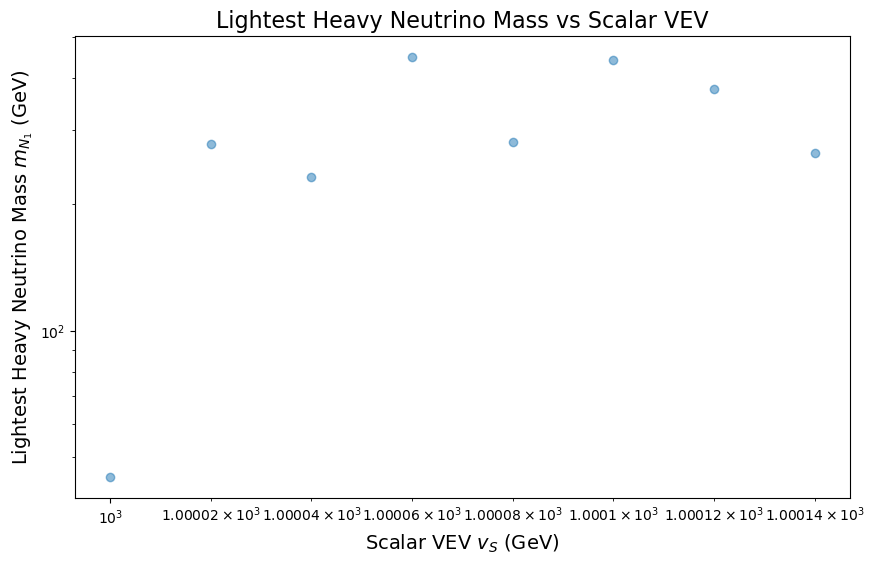

In [89]:
'''Now, I want to try and make a plot of the mass of the lightest heavy neutrino versus the scalar VEV for certain values of the VEV motivated by Hierarchy Problem. The constraint used will be that of the mixing angles up to 3\sigma.'''


vH = 246 #VEV in GeV
vS_values = np.linspace(1000, 3000, 100000) #VEV in GeV
light_heavy = []


for vS in vS_values:
    #Setting Yukawas and Mass Matrices
    A = (np.random.uniform(0.5e-10, 1e-10, (3,3)) + 1j*np.random.uniform(0.5e-10, 1.5e-10, (3,3)))
    yL = (A + A.T)/2 #Making sure the matrix is symmetric
    B = (np.random.uniform(0.5e-10, 1.5e-10, (3,3)) + 1j*np.random.uniform(0.5e-10, 1.5e-10, (3,3)))
    yR = (B + B.T)/2 #Making sure the matrix is symmetric
    C = (np.random.uniform(1, 1.5, (3,3)) + 1j*np.random.uniform(1, 1.5, (3,3)))
    yD = C
    D = (np.random.uniform(1, 1.5, (3,3)) + 1j*np.random.uniform(1, 1.5, (3,3)))
    yN = D
    mL, mR, mD, mN = vS*yL, vS*yR, vH*yD, vS*yN
    mLight = mD.T @ np.linalg.inv(mN) @ mL @ np.linalg.inv(mN.T) @ mD #Seesaw Formula
    U, S, Vh = np.linalg.svd(mLight)
    s13 = np.abs(U[0,2])
    c12 = np.abs(U[0,0]) / np.sqrt(1 - s13**2)
    s12 = np.sqrt(1 - c12**2)
    s23 = np.abs(U[1,2]) / np.sqrt(1 - s13**2)
    MS = np.block([
    [mR, mN.T],
    [mN, mL]
                ])
    U_heavy, S_heavy, Vh_heavy = np.linalg.svd(MS)
    massesLightHeavy = np.sort(S_heavy)
    a, b, c = 8.19 <= np.degrees(np.arcsin(s13)) <= 8.89, 31.63 <= np.degrees(np.arcsin(s12)) <= 35.95, 41.3 <= np.degrees(np.arcsin(s23)) <= 49.9
    if a and b and c:
        light_heavy.append(massesLightHeavy[0])

fig, ax = plt.subplots(figsize=(10,6))
ax.plot(vS_values[:len(light_heavy)], light_heavy, 'o', alpha=0.5)

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r'Scalar VEV $v_S$ (GeV)', fontsize=14)
ax.set_ylabel(r'Lightest Heavy Neutrino Mass $m_{N_1}$ (GeV)', fontsize=14)
ax.set_title('Lightest Heavy Neutrino Mass vs Scalar VEV', fontsize=16)

In [94]:
'''Now, I will only use unitarity violation, i.e \eta, bounds.'''


vH = 246 #VEV in GeV
vS_values = np.linspace(1000, 3000, 1000) #VEV in GeV
light_heavy = []
eta_limit = 7.2e-6 #This is on \eta_{e \mu} at 95%C.L.


for vev in vS_values:
    #Setting Yukawas and Mass Matrices
    A = (np.random.uniform(0.5e-10, 1e-10, (3,3)) + 1j*np.random.uniform(0.5e-10, 1.5e-10, (3,3)))
    yL = (A + A.T)/2 #Making sure the matrix is symmetric
    B = (np.random.uniform(0.5e-10, 1.5e-10, (3,3)) + 1j*np.random.uniform(0.5e-10, 1.5e-10, (3,3)))
    yR = (B + B.T)/2 #Making sure the matrix is symmetric
    C = (np.random.uniform(1, 1.5, (3,3)) + 1j*np.random.uniform(1, 1.5, (3,3)))
    yD = C
    D = (np.random.uniform(1, 1.5, (3,3)) + 1j*np.random.uniform(1, 1.5, (3,3)))
    yN = D
    mL, mR, mD, mN = vev*yL, vev*yR, vH*yD, vev*yN
    mLight = mD.T @ np.linalg.inv(mN) @ mL @ np.linalg.inv(mN.T) @ mD #Seesaw Formula
    U, S, Vh = np.linalg.svd(mLight)
    s13 = np.abs(U[0,2])
    c12 = np.abs(U[0,0]) / np.sqrt(1 - s13**2)
    s12 = np.sqrt(1 - c12**2)
    s23 = np.abs(U[1,2]) / np.sqrt(1 - s13**2)
    MS = np.block([
    [mR, mN.T],
    [mN, mL]])
    U_heavy, S_heavy, Vh_heavy = np.linalg.svd(MS)
    massesLightHeavy = np.sort(S_heavy)
    MD = np.block([
        [mD],
        [np.zeros((3,3))]
    ])
    G = (MD.T @ np.linalg.inv(MS)).conj()
    eta = 1/2 * G @ G.conj().T
    eta_em = np.abs(eta[0,1])
    if eta_em <= eta_limit:
        light_heavy.append(massesLightHeavy[0])

light_heavy = np.array(light_heavy)



<>:1: SyntaxWarning: invalid escape sequence '\e'
<>:1: SyntaxWarning: invalid escape sequence '\e'
/tmp/ipykernel_21705/1044245876.py:1: SyntaxWarning: invalid escape sequence '\e'
  '''Now, I will only use unitarity violation, i.e \eta, bounds.'''
